### Making more maps based on reviewers' helpful comments

In [1]:
%matplotlib inline
import os
import shutil

from glob import glob

import cftime

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

import intake
import pop_tools
import esmlab
import utils
import matplotlib.path as mpath
import warnings
warnings.filterwarnings('ignore')

In [2]:
members = ['002', '009', '010', '011', '012', '013', '014', '015', '016', 
           '017', '018', '019', '020', '021', '022', '023', '024', '025', 
           '026', '027', '028', '029', '030', '031', '032', '033', '034', 
           '035', '101', '102', '103', '104', '105']

In [3]:
%%time
variables = ['DIA_IMPVF_Fe','HDIFB_Fe','WT_Fe']


ds2_list = []
ds2 = xr.Dataset()

path = '/glade/campaign/cesm/collections/cesmLE/CESM-CAM5-BGC-LE/ocn/proc/tseries/annual/'

for ens_mem in members:
    
    print(ens_mem)
    
    ds = xr.Dataset()
    ds_list = []
    
    for v in variables:  

        files = sorted(glob(f'{path}{v}/b.e11.B20TRC5CNBDRD.f09_g16.{ens_mem}.pop.h.ecosys.nyear1.{v}.1920-2005.nc'))  

        dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="member_id",combine='nested',
                           drop_variables=["transport_components", "transport_regions"], decode_times=True)

        ds = xr.merge((ds, dsv))
        ds_list.append(ds)
        
    ds2 = xr.concat((ds2, ds),'member_id')
    ds2_list.append(ds2)

002
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
101
102
103
104
105
CPU times: user 32 s, sys: 1.54 s, total: 33.5 s
Wall time: 54.1 s


In [4]:
%%time
variables = ['DIA_IMPVF_Fe','HDIFB_Fe','WT_Fe']


ds2_rcp85_list = []
ds2_rcp85 = xr.Dataset()

path = '/glade/campaign/cesm/collections/cesmLE/CESM-CAM5-BGC-LE/ocn/proc/tseries/annual/'

for ens_mem in members:
    
    print(ens_mem)

    ds_rcp85_list = []
    ds_rcp85 = xr.Dataset()

    for v in variables:  

        files = sorted(glob(f'{path}{v}/b.e11.BRCP85C5CNBDRD.f09_g16.{ens_mem}.pop.h.ecosys.nyear1.{v}.????-????.nc'))  

        dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                           drop_variables=["transport_components", "transport_regions"], decode_times=True)

        ds_rcp85 = xr.merge((ds_rcp85, dsv))
        ds_rcp85_list.append(ds_rcp85)
        
    ds2_rcp85 = xr.concat((ds2_rcp85, ds_rcp85),'member_id')
    ds2_rcp85_list.append(ds2_rcp85)
        

002
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
101
102
103
104
105
CPU times: user 35.3 s, sys: 938 ms, total: 36.2 s
Wall time: 57.5 s


In [5]:
ds = xr.concat(
    [ds2,ds2_rcp85], 
    dim='time', 
    data_vars='minimal')

In [6]:
#ds

In [7]:
%%time
path = '/glade/scratch/kristenk/CESM-LE-output/CESM-LE-'
variables = ['NPP_zint100m','POC_FLUX_100m','TAUX','TAUY','phys_med_PO4','HMXL','Fe_avg_100m','IFRAC']

ds_list = []
ds2 = xr.Dataset()

for v in variables:  
    print(v)
    files = sorted(glob(f'{path}{v}.nc'))  

    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    ds2 = xr.merge((ds2, dsv))
    ds_list.append(ds2)

NPP_zint100m
POC_FLUX_100m
TAUX
TAUY
phys_med_PO4
HMXL
Fe_avg_100m
IFRAC
CPU times: user 558 ms, sys: 12 ms, total: 570 ms
Wall time: 1.12 s


In [8]:
ds

,Array,Chunk
Bytes,164.05 GiB,2.36 GiB
Shape,"(33, 181, 60, 384, 320)","(1, 86, 60, 384, 320)"
Count,2135 Tasks,99 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,164.05 GiB,2.36 GiB
Shape,"(33, 181, 60, 384, 320)","(1, 86, 60, 384, 320)"
Count,2135 Tasks,99 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [9]:
ds['dz'] = ds.dz.isel(member_id=0)

In [10]:
grid = pop_tools.get_grid('POP_gx1v6')
lons = grid.TLONG
lats = grid.TLAT

### calculate Fe flux at 100m

In [11]:
# k_100m_top = np.where(ds.z_w_top == 100e2)[0][0]
# k_100m_bot = np.where(ds.z_w_bot == 100e2)[0][0]
# DIA_IMPVF = (-1.0) * ds.DIA_IMPVF_Fe.isel(z_w_bot=k_100m_bot)
# HDIFB = (-1.0) * ds.HDIFB_Fe.isel(z_w_bot=k_100m_bot) * ds.dz[k_100m_bot]
# WT = ds.WT_Fe.isel(z_w_top=k_100m_top) * ds.dz[k_100m_top]

In [12]:
#HDIFB

In [13]:
def derive_var_Fe_FLUX_IN_100m(ds):
    """compute Fe flux across 100m (positive down)"""
    k_100m_top = np.where(ds.z_w_top == 100e2)[0][0]
    k_100m_bot = np.where(ds.z_w_bot == 100e2)[0][0]
    DIA_IMPVF = (-1.0) * ds.DIA_IMPVF_Fe.isel(z_w_bot=k_100m_bot)
    HDIFB = (-1.0) * ds.HDIFB_Fe.isel(z_w_bot=k_100m_bot) * ds.dz[k_100m_bot]
    WT = ds.WT_Fe.isel(z_w_top=k_100m_top) * ds.dz[k_100m_top]

    ds['Fe_FLUX_IN_100m'] = (DIA_IMPVF + HDIFB + WT)
    ds.Fe_FLUX_IN_100m.attrs = ds.WT_Fe.attrs
    ds.Fe_FLUX_IN_100m.attrs['long_name'] = 'Fe flux across 100 m (positive up)'
    ds.Fe_FLUX_IN_100m.attrs['units'] = 'nmol/s/cm^2'
    ds.Fe_FLUX_IN_100m.encoding = ds.WT_Fe.encoding
    return ds.drop(['DIA_IMPVF_Fe', 'HDIFB_Fe', 'WT_Fe'])

In [14]:
ds = derive_var_Fe_FLUX_IN_100m(ds)

In [15]:
ds.Fe_FLUX_IN_100m

,Array,Chunk
Bytes,2.73 GiB,40.31 MiB
Shape,"(33, 181, 384, 320)","(1, 86, 384, 320)"
Count,7297 Tasks,99 Chunks
Type,float32,numpy.ndarray


In [16]:
ds['time'] = np.arange(1920,2101,1)

In [17]:
ds.Fe_FLUX_IN_100m

,Array,Chunk
Bytes,2.73 GiB,40.31 MiB
Shape,"(33, 181, 384, 320)","(1, 86, 384, 320)"
Count,7297 Tasks,99 Chunks
Type,float32,numpy.ndarray


In [18]:
nmol_cm2_s_to_nmol_m2_d = 10000. * 86400.
ds['Fe_FLUX_IN_100m'] = ds['Fe_FLUX_IN_100m'] * nmol_cm2_s_to_nmol_m2_d
ds.Fe_FLUX_IN_100m.attrs['units'] = 'nmol/d/m^2'

In [19]:
ds2['eratio'] = ds2.POC_FLUX_100m/ds2.NPP_zint100m

In [50]:
ds2.Fe_avg_100m

<xarray.DataArray 'Fe_avg_100m' (time: 181, member_id: 34, nlat: 384, nlon: 320)>
dask.array<open_dataset-eb2d05c7735f89bdffaf9b5627e24fdbFe_avg_100m, shape=(181, 34, 384, 320), dtype=float64, chunksize=(181, 34, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
  * time       (time) int64 1920 1921 1922 1923 1924 ... 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Fe avg in the top 100m
    units:         mmol/m^3
    grid_loc:      3111
    cell_methods:  time: mean

### extract 1920s

In [20]:
ds.time.isel(time=slice(0,10)).values

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929])

In [21]:
ds2.time.isel(time=slice(0,10)).values

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929])

In [22]:
ds_1920s = ds.isel(time=slice(0,10)).mean(dim='time').mean(dim='member_id')
ds2_1920s = ds2.isel(time=slice(0,10)).mean(dim='time').mean(dim='member_id')

In [23]:
ds2_1920s

<xarray.Dataset>
Dimensions:        (nlat: 384, nlon: 320, z_t: 60)
Coordinates:
    TLAT           (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG          (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    KMT            (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA          (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    dz             (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    NPP_zint100m   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    POC_FLUX_100m  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAUX           (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAUY           (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    phys_med_PO4   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HMXL           (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    Fe_avg_100m    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    IFRAC          (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    eratio         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>

### extract 1990s

In [24]:
ds.time.isel(time=slice(70,80)).values

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])

In [25]:
ds2.time.isel(time=slice(70,80)).values

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])

In [26]:
ds_1990s = ds.isel(time=slice(70,80)).mean(dim='time').mean(dim='member_id')
ds2_1990s = ds2.isel(time=slice(70,80)).mean(dim='time').mean(dim='member_id')

### Extract 2090s

In [27]:
ds.time.isel(time=slice(-11,-1)).values

array([2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099])

In [28]:
ds2.time.isel(time=slice(-11,-1)).values

array([2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099])

In [29]:
ds_2090s = ds.isel(time=slice(-11,-1)).mean(dim='time').mean(dim='member_id')
ds2_2090s = ds2.isel(time=slice(-11,-1)).mean(dim='time').mean(dim='member_id')

In [30]:
ds2_2090s

<xarray.Dataset>
Dimensions:        (nlat: 384, nlon: 320, z_t: 60)
Coordinates:
    TLAT           (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG          (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    KMT            (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA          (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    dz             (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    NPP_zint100m   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    POC_FLUX_100m  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAUX           (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAUY           (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    phys_med_PO4   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HMXL           (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    Fe_avg_100m    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    IFRAC          (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    eratio         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>

### Make a diff dataset

In [31]:
ds_diff = xr.Dataset()

In [32]:
ds_diff['POC_FLUX_100m'] = ds2_2090s.POC_FLUX_100m - ds2_1920s.POC_FLUX_100m
ds_diff['NPP_zint100m'] = ds2_2090s.NPP_zint100m - ds2_1920s.NPP_zint100m
ds_diff['eratio'] = ds2_2090s.eratio - ds2_1920s.eratio
ds_diff['TAUX'] = ds2_2090s.TAUX - ds2_1920s.TAUX
ds_diff['TAUY'] = ds2_2090s.TAUY - ds2_1920s.TAUY
ds_diff['phys_med_PO4'] = ds2_2090s.phys_med_PO4 - ds2_1920s.phys_med_PO4

In [33]:
ds_diff['HMXL'] = ds2_2090s.HMXL - ds2_1920s.HMXL
ds_diff['IFRAC'] = ds2_2090s.IFRAC - ds2_1920s.IFRAC
ds_diff['Fe_avg_100m'] = ds2_2090s.Fe_avg_100m - ds2_1920s.Fe_avg_100m

In [34]:
ds_diff['Fe_FLUX_IN_100m'] = ds_2090s.Fe_FLUX_IN_100m - ds_1920s.Fe_FLUX_IN_100m

In [35]:
import dask

# Use dask jobqueue
from dask_jobqueue import PBSCluster

# Import a client
from dask.distributed import Client

# Setup your PBSCluster
cluster = PBSCluster(
    cores=2, # The number of cores you want
    memory='256 GB', # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus=2:mem=256GB', # Specify resources
    project='NCGD0011', # Input your project ID here
    walltime='01:00:00', # Amount of wall time
    interface='ib0', # Interface to use
)
# Scale up
cluster.scale(8)

# Change your url to the dask dashboard so you can see it
dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'})

# Setup your client
client = Client(cluster)

In [36]:
client

Client Scheduler: tcp://10.12.206.42:36536 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kristenk/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [37]:
ds_diff = ds_diff.load()

In [38]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8
    
    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

In [39]:
file = '/glade/work/kristenk/TTE_CESM-LE/masks_1920s_v3.nc'
ds_masks = xr.open_dataset(file,decode_times=False)

outside=np.full((384, 320), 2)
inside = ds_masks.ACC_mask.where(ds_masks.ACC_mask ==1)
inside = np.asarray(inside)
outside[~np.isnan(inside)] = inside[~np.isnan(inside)]
ACC=xr.DataArray(outside)
ACC=ACC.rename({'dim_0':'nlat'})
ACC=ACC.rename({'dim_1':'nlon'})
#ACC.plot()

outside=np.full((384, 320), 2)
inside = ds_masks.SIZ_mask.where(ds_masks.SIZ_mask ==1)
inside = np.asarray(inside)
outside[~np.isnan(inside)] = inside[~np.isnan(inside)]
SIZ=xr.DataArray(outside)
SIZ=SIZ.rename({'dim_0':'nlat'})
SIZ=SIZ.rename({'dim_1':'nlon'})
#SIZ.plot()

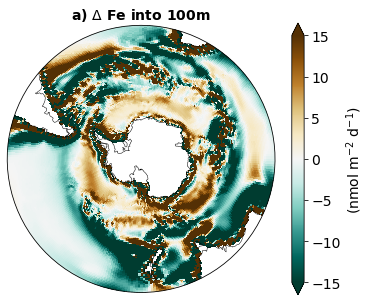

In [40]:
fig = plt.figure(figsize=(6,5))

lon, lat, field = adjust_pop_grid(lons, lats,ds_diff.Fe_FLUX_IN_100m)


ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_title('a) ${\Delta}$ Fe into 100m',fontsize=14, fontweight='bold')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle

pc=ax.pcolormesh(lon, lat, 
                 field, 
                 vmin=-15, vmax=15, 
                 #vmin=0.000001,vmax=0.0001,
                 cmap='BrBG_r',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='(nmol m$^{-2}$ d$^{-1}$)',size=14)
cbar1.ax.tick_params(labelsize=14)

#fig.savefig('/glade/work/kristenk/figs/change_in_Fe_mean_150m.png', bbox_inches='tight', dpi=300, format='png');

In [41]:
#################### make it a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

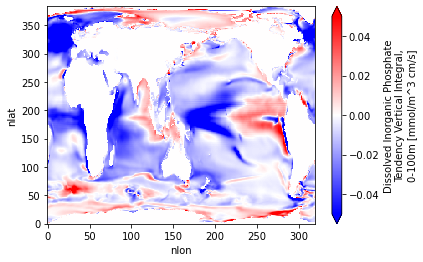

In [42]:
(ds_diff.phys_med_PO4 *86400 *0.01).plot(vmin=-0.05,vmax=0.05,cmap='bwr')

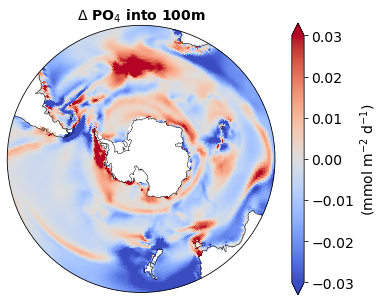

In [53]:
fig = plt.figure(figsize=(6,5))

ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_title('${\Delta}$ PO$_4$ into 100m',fontsize=14, fontweight='bold')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
# make it a circle
ax.set_boundary(circle, transform=ax.transAxes)

lon, lat, field = adjust_pop_grid(lons, lats,(ds_diff.phys_med_PO4 *86400 *0.01))
pc=ax.pcolormesh(lon, lat, 
                 field, 
                 vmin=-0.03, vmax=0.03,
                 cmap='coolwarm',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='(mmol m$^{-2}$ d$^{-1}$)',size=14)
cbar1.ax.tick_params(labelsize=14)





fig.savefig('/glade/work/kristenk/figs/change_in_PO4_flux.png', bbox_inches='tight', dpi=300, format='png');

In [44]:
ds_diff = ds_diff.where(grid.REGION_MASK>0)

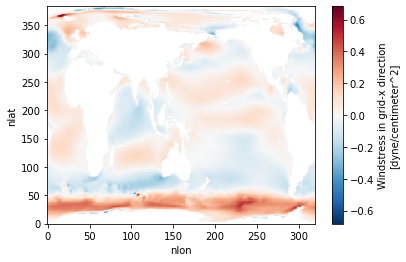

In [45]:
ds_diff.TAUX.plot()

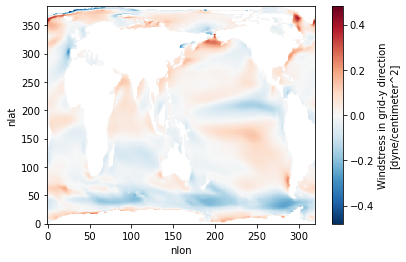

In [46]:
ds_diff.TAUY.plot()

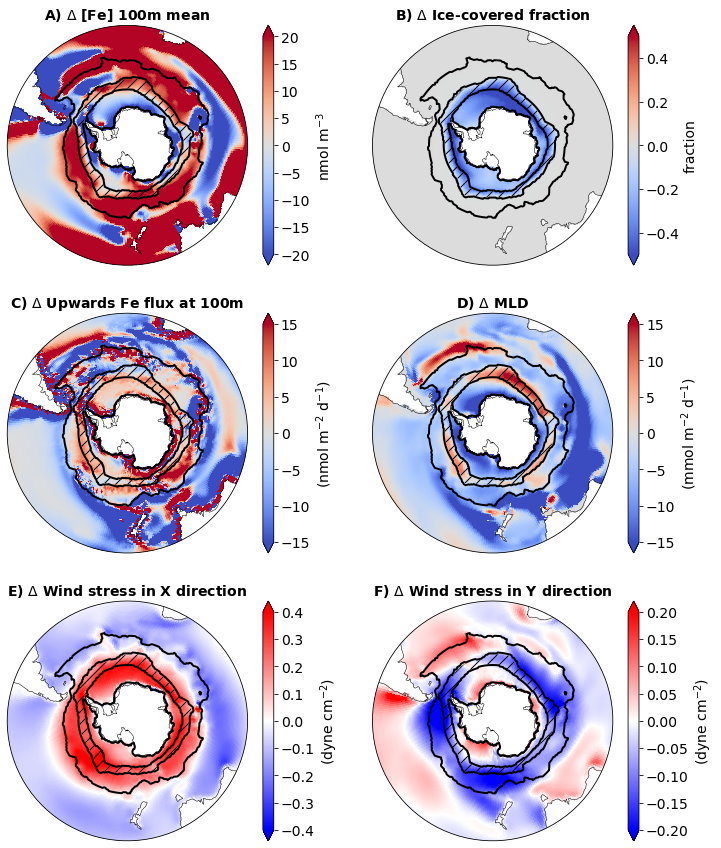

In [52]:
fig = plt.figure(figsize=(12,15))

ax = fig.add_subplot(3,2,1, projection=ccrs.SouthPolarStereo())
ax.set_title('A) ${\Delta}$ [Fe] 100m mean', fontsize=14, fontweight='bold')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle
convert = 1.e6 #for converting mmol/m3 to nmol/m3
lon, lat, field = utils.adjust_pop_grid(lons, lats, ds_diff.Fe_avg_100m*convert)

pc=ax.pcolormesh(lon, lat, 
                 field, vmin=-20, vmax=20, 
                 cmap='coolwarm',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

## SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, SIZ)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### ACC
lon, lat, field = utils.adjust_pop_grid(lons, lats, ACC)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### marginal SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, ds_masks.marginal_SIZ_mask)
pci=ax.contourf(lon, lat, field,levels=[0.1,0.85],transform=ccrs.PlateCarree(),hatches=['//'],colors='none')


cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='nmol m$^{-3}$',size=14)
cbar1.ax.tick_params(labelsize=14)

##############################################################################################
ax = fig.add_subplot(3,2,2, projection=ccrs.SouthPolarStereo())
ax.set_title('B) ${\Delta}$ Ice-covered fraction', fontsize=14, fontweight='bold')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

#################### make it a circle
ax.set_boundary(circle, transform=ax.transAxes)
#################### end circle
lon, lat, field = utils.adjust_pop_grid(lons, lats, ds_diff.IFRAC)

pc=ax.pcolormesh(lon, lat, 
                 field, vmin=-0.5, vmax=0.5, 
                 cmap='coolwarm',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

## SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, SIZ)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### ACC
lon, lat, field = utils.adjust_pop_grid(lons, lats, ACC)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### marginal SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, ds_masks.marginal_SIZ_mask)
pci=ax.contourf(lon, lat, field,levels=[0.1,0.85],transform=ccrs.PlateCarree(),hatches=['//'],colors='none')


cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='fraction',size=14)
cbar1.ax.tick_params(labelsize=14)





ax = fig.add_subplot(3,2,3, projection=ccrs.SouthPolarStereo())
ax.set_title('C) ${\Delta}$ Upwards Fe flux at 100m',fontsize=14, fontweight='bold')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
# make it a circle
ax.set_boundary(circle, transform=ax.transAxes)

lon, lat, field = adjust_pop_grid(lons, lats,ds_diff.Fe_FLUX_IN_100m)
pc=ax.pcolormesh(lon, lat, 
                 field, 
                 vmin=-15, vmax=15,
                 cmap='coolwarm',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
## SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, SIZ)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### ACC
lon, lat, field = utils.adjust_pop_grid(lons, lats, ACC)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### marginal SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, ds_masks.marginal_SIZ_mask)
pci=ax.contourf(lon, lat, field,levels=[0.1,0.85],transform=ccrs.PlateCarree(),hatches=['//'],colors='none')

cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='(nmol m$^{-2}$ d$^{-1}$)',size=14)
cbar1.ax.tick_params(labelsize=14)

ax = fig.add_subplot(3,2,4, projection=ccrs.SouthPolarStereo())
ax.set_title('D) ${\Delta}$ MLD',fontsize=14, fontweight='bold')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
# make it a circle
ax.set_boundary(circle, transform=ax.transAxes)

#lon, lat, field = adjust_pop_grid(lons, lats,(ds_diff.phys_med_PO4 *86400 *0.01))
lon, lat, field = adjust_pop_grid(lons, lats,(ds_diff.HMXL*0.01))
pc=ax.pcolormesh(lon, lat, 
                 field, 
                 #vmin=-0.03, vmax=0.03,
                 vmin=-15, vmax=15,
                 cmap='coolwarm',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)

## SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, SIZ)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### ACC
lon, lat, field = utils.adjust_pop_grid(lons, lats, ACC)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### marginal SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, ds_masks.marginal_SIZ_mask)
pci=ax.contourf(lon, lat, field,levels=[0.1,0.85],transform=ccrs.PlateCarree(),hatches=['//'],colors='none')


cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='(mmol m$^{-2}$ d$^{-1}$)',size=14)
cbar1.ax.tick_params(labelsize=14)



ax = fig.add_subplot(3,2,5, projection=ccrs.SouthPolarStereo())
ax.set_title('E) ${\Delta}$ Wind stress in X direction',fontsize=14, fontweight='bold')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
# make it a circle
ax.set_boundary(circle, transform=ax.transAxes)

lon, lat, field = adjust_pop_grid(lons, lats,ds_diff.TAUX)
pc=ax.pcolormesh(lon, lat, 
                 field, 
                 vmin=-0.4, vmax=0.4,
                 cmap='bwr',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
## SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, SIZ)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### ACC
lon, lat, field = utils.adjust_pop_grid(lons, lats, ACC)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### marginal SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, ds_masks.marginal_SIZ_mask)
pci=ax.contourf(lon, lat, field,levels=[0.1,0.85],transform=ccrs.PlateCarree(),hatches=['//'],colors='none')

cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='(dyne cm$^{-2}$)',size=14)
cbar1.ax.tick_params(labelsize=14)




ax = fig.add_subplot(3,2,6, projection=ccrs.SouthPolarStereo())
ax.set_title('F) ${\Delta}$ Wind stress in Y direction',fontsize=14, fontweight='bold')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
# make it a circle
ax.set_boundary(circle, transform=ax.transAxes)

lon, lat, field = adjust_pop_grid(lons, lats,(ds_diff.TAUY))
pc=ax.pcolormesh(lon, lat, 
                 field, 
                 vmin=-0.2, vmax=0.2,
                 cmap='bwr',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
## SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, SIZ)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### ACC
lon, lat, field = utils.adjust_pop_grid(lons, lats, ACC)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### marginal SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, ds_masks.marginal_SIZ_mask)
pci=ax.contourf(lon, lat, field,levels=[0.1,0.85],transform=ccrs.PlateCarree(),hatches=['//'],colors='none')

cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='(dyne cm$^{-2}$)',size=14)
cbar1.ax.tick_params(labelsize=14)

fig.savefig('/glade/work/kristenk/figs/additional_change_maps.png', bbox_inches='tight', dpi=300, format='png');

### Biological pump figure

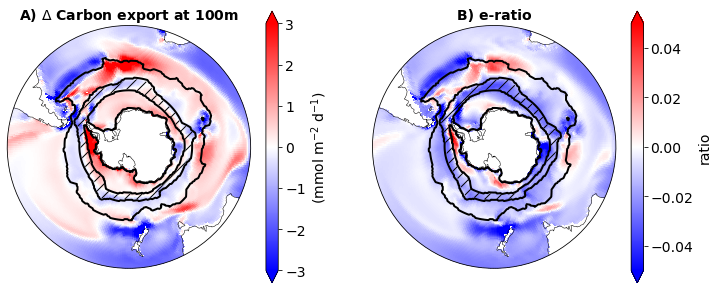

In [53]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,2,1, projection=ccrs.SouthPolarStereo())
ax.set_title('A) ${\Delta}$ Carbon export at 100m',fontsize=14, fontweight='bold')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
# make it a circle
ax.set_boundary(circle, transform=ax.transAxes)

lon, lat, field = adjust_pop_grid(lons, lats,(ds_diff.POC_FLUX_100m*86400*0.01))
pc=ax.pcolormesh(lon, lat, 
                 field, 
                 vmin=-3, vmax=3,
                 cmap='bwr',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
## SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, SIZ)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### ACC
lon, lat, field = utils.adjust_pop_grid(lons, lats, ACC)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### marginal SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, ds_masks.marginal_SIZ_mask)
pci=ax.contourf(lon, lat, field,levels=[0.1,0.85],transform=ccrs.PlateCarree(),hatches=['//'],colors='none')

cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='(mmol m$^{-2}$ d$^{-1}$)',size=14)
cbar1.ax.tick_params(labelsize=14)

ax = fig.add_subplot(1,2,2, projection=ccrs.SouthPolarStereo())
ax.set_title('B) e-ratio',fontsize=14, fontweight='bold')
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
# make it a circle
ax.set_boundary(circle, transform=ax.transAxes)

lon, lat, field = adjust_pop_grid(lons, lats,(ds_diff.eratio))
pc=ax.pcolormesh(lon, lat, 
                 field, 
                 vmin=-0.05, vmax=0.05,
                 cmap='bwr',
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=0.5)
## SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, SIZ)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### ACC
lon, lat, field = utils.adjust_pop_grid(lons, lats, ACC)
pci=ax.contour(lon, lat, field,levels=[1],colors='black',transform=ccrs.PlateCarree(),linewidths=2)

### marginal SIZ
lon, lat, field = utils.adjust_pop_grid(lons, lats, ds_masks.marginal_SIZ_mask)
pci=ax.contourf(lon, lat, field,levels=[0.1,0.85],transform=ccrs.PlateCarree(),hatches=['//'],colors='none')

cbar1 = fig.colorbar(pc, ax=ax,extend='both')
cbar1.set_label(label='ratio',size=14)
cbar1.ax.tick_params(labelsize=14)





fig.savefig('/glade/work/kristenk/figs/export_fig.png', bbox_inches='tight', dpi=300, format='png');

In [54]:
cluster.close()